In [15]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 40 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

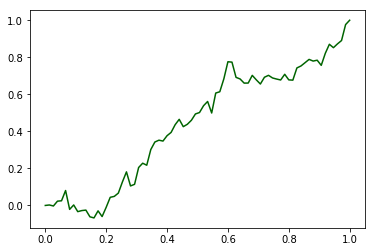

In [39]:
lor =  y_score[:,2].cumsum() / y_score[:,2].sum()
lor = np.insert(lor,0,0)

plt.clf()
plt.plot(np.arange(lor.size)/(lor.size-1), lor, color='darkgreen')

plt.show()

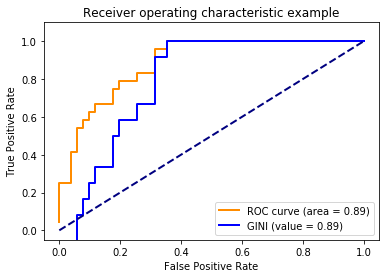

In [29]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])

X_lorenz = 

plt.plot(fpr[2], (2*tpr[2]) -1 , color='blue',
         lw=lw, label='GINI (value = %0.2f)' % roc_auc[2])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

0.5895


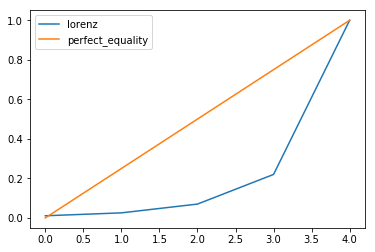

In [41]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import trapz

GDP = (653200000000)
A = (0.49 * GDP) / 100 # Poorest 10%
B = (0.59 * GDP) / 100
C = (0.69 * GDP) / 100
D = (0.79 * GDP) / 100
E = (1.89 * GDP) / 100
F = (2.55 * GDP) / 100
G = (5.0 * GDP) / 100
H = (10.0 * GDP) / 100
I = (18.0 * GDP) / 100
J = (60.0 * GDP) / 100 # Richest 10%

# Divide into quintiles and total income within each quintile
Q1 = float(A + B) # lowest quintile
Q2 = float(C + D) # second quintile
Q3 = float(E + F) # third quintile
Q4 = float(G + H) # fourth quintile
Q5 = float(I + J) # fifth quintile

# Calculate the percent of total income in each quintile
T1 = float((100 * Q1) / GDP) / 100
T2 = float((100 * Q2) / GDP) / 100
T3 = float((100 * Q3) / GDP) / 100
T4 = float((100 * Q4) / GDP) / 100
T5 = float((100 * Q5) / GDP) / 100

TR = float(T1 + T2 + T3 + T4 + T5)

# Calculate the cumulative percentage of household income
H1 = float(T1)
H2 = float(T1+T2)
H3 = float(T1+T2+T3)
H4 = float(T1+T2+T3+T4)
H5 = float(T1+T2+T3+T4+T5)

# The y values. Cumulative percentage of incomes
y = np.array([H1,H2,H3,H4,H5])

# The perfect equality y values. Cumulative percentage of incomes.
y_pe = np.linspace(0.0,1.0,len(y))

# Compute the area using the composite trapezoidal rule.
area_lorenz = np.trapz(y, dx=5)

# Calculate the area below the perfect equality line.
area_perfect = np.trapz(y_pe, dx=5)

# Seems to work fine until here. 
# Manually calculated Gini using the values given for the areas above 
# turns out at .58 which seems reasonable?

Gini = (area_perfect - area_lorenz)/area_perfect

print(Gini)

plt.plot(y,label='lorenz')
plt.plot(y_pe,label='perfect_equality')
plt.legend()
plt.show()